In [2]:
import pandas as pd

# Load features from CSV
features_path = "../Extracted Features/features_combined_extended.csv"
df = pd.read_csv(features_path)

print("✅ Features loaded:", df.shape)
df.head()


✅ Features loaded: (50999, 35)


,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,...,mfcc_std_13,zcr,rms,spec_centroid,spec_bandwidth,spec_rolloff,spec_contrast,pitch_mean,pitch_std,label
0,-273.23062,156.86295,-12.459389,39.521244,7.261509,20.760902,10.876893,6.671418,8.002936,-2.015242,...,8.468726,0.038824,0.080054,1996.462129,2520.143519,3979.527585,18.420540,1101.2179,975.68524,1
1,-256.68625,164.62277,-24.539558,46.576527,8.700367,24.575415,3.850657,2.503540,3.840417,-8.115285,...,9.748356,0.037877,0.085325,2006.927278,2555.434765,4123.725680,18.574471,1242.4299,1021.02410,1
2,-263.25812,126.02191,10.519299,13.731587,2.823969,-0.808076,-7.619192,-5.127765,-4.889288,1.153538,...,9.188738,0.062159,0.104295,1134.146538,1487.393990,2435.680651,20.445393,540.1105,399.05110,1
3,-268.97958,163.25003,-14.135536,47.959816,11.678417,21.017126,10.747832,0.312097,4.160600,-6.515533,...,7.966469,0.035575,0.079903,1853.842217,2415.677132,3658.823627,18.410713,1051.3286,991.42800,1
4,-248.03513,70.74574,1.210651,28.527310,10.741900,7.105612,-21.620281,-8.006638,-14.241697,0.926107,...,10.499650,0.132538,0.046797,1905.150103,1836.264358,3898.651541,20.023784,1371.6462,1039.58670,1


### 🔹 Step 1: Feature and Label Separation

We split the dataset into two parts:
- `X` contains all the input features used for model training.
- `y` is the label column (1 = Real, 0 = Fake), which the model will learn to predict.

This step is essential to prepare the data for supervised machine learning.


In [3]:
X = df.drop("label", axis=1)
y = df["label"]


### 🔹 Step 2: Train-Test Split

We split the dataset into training and testing sets using an 80/20 ratio:
- `X_train`, `y_train`: used to train the model.
- `X_test`, `y_test`: used to evaluate how well the model generalizes.

The `stratify=y` parameter ensures the class distribution remains balanced across both sets.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### 🔹 Step 3: Feature Scaling

We standardize the features so that each has a mean of 0 and standard deviation of 1. This helps many machine learning models perform better.

- `StandardScaler()` scales features independently.
- `fit_transform()` is applied to the training set.
- `transform()` is applied to the test set using the same scaler to prevent data leakage.


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 🔹 Step 4: Initialize Classical Machine Learning Models

We define a dictionary of classical machine learning models to compare their performance:

- **Logistic Regression**: A linear model for binary classification.
- **Random Forest**: An ensemble of decision trees.
- **XGBoost**: A powerful gradient boosting model.
- **SVM (Support Vector Machine)**: Finds the best separating hyperplane with a linear kernel.

These models will be trained and evaluated on the extracted features.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(kernel="linear", probability=True)
}


### 🔹 Step 5: Train & Evaluate Models

Each model is trained on the training set and evaluated on the test set using the following metrics:

- **Accuracy**: Overall correctness of the model.
- **Precision**: How many predicted fakes are actually fake.
- **Recall**: How many actual fakes were correctly identified.
- **F1 Score**: Harmonic mean of precision and recall.

The results are printed for each model and stored for comparison.


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    print(f"✅ {name} Results:")
    print(f"  📊 Accuracy: {accuracy:.4f}")
    print(f"  🎯 Precision: {precision:.4f}")
    print(f"  🔄 Recall: {recall:.4f}")
    print(f"  🏆 F1 Score: {f1:.4f}")



🚀 Training Logistic Regression...
✅ Logistic Regression Results:
  📊 Accuracy: 0.8906
  🎯 Precision: 0.8996
  🔄 Recall: 0.9256
  🏆 F1 Score: 0.9124

🚀 Training Random Forest...
✅ Random Forest Results:
  📊 Accuracy: 0.9799
  🎯 Precision: 0.9744
  🔄 Recall: 0.9935
  🏆 F1 Score: 0.9838

🚀 Training XGBoost...


/opt/anaconda3/envs/Arsh/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [07:19:03] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Results:
  📊 Accuracy: 0.9871
  🎯 Precision: 0.9861
  🔄 Recall: 0.9930
  🏆 F1 Score: 0.9895

🚀 Training SVM...
✅ SVM Results:
  📊 Accuracy: 0.8954
  🎯 Precision: 0.8973
  🔄 Recall: 0.9374
  🏆 F1 Score: 0.9169


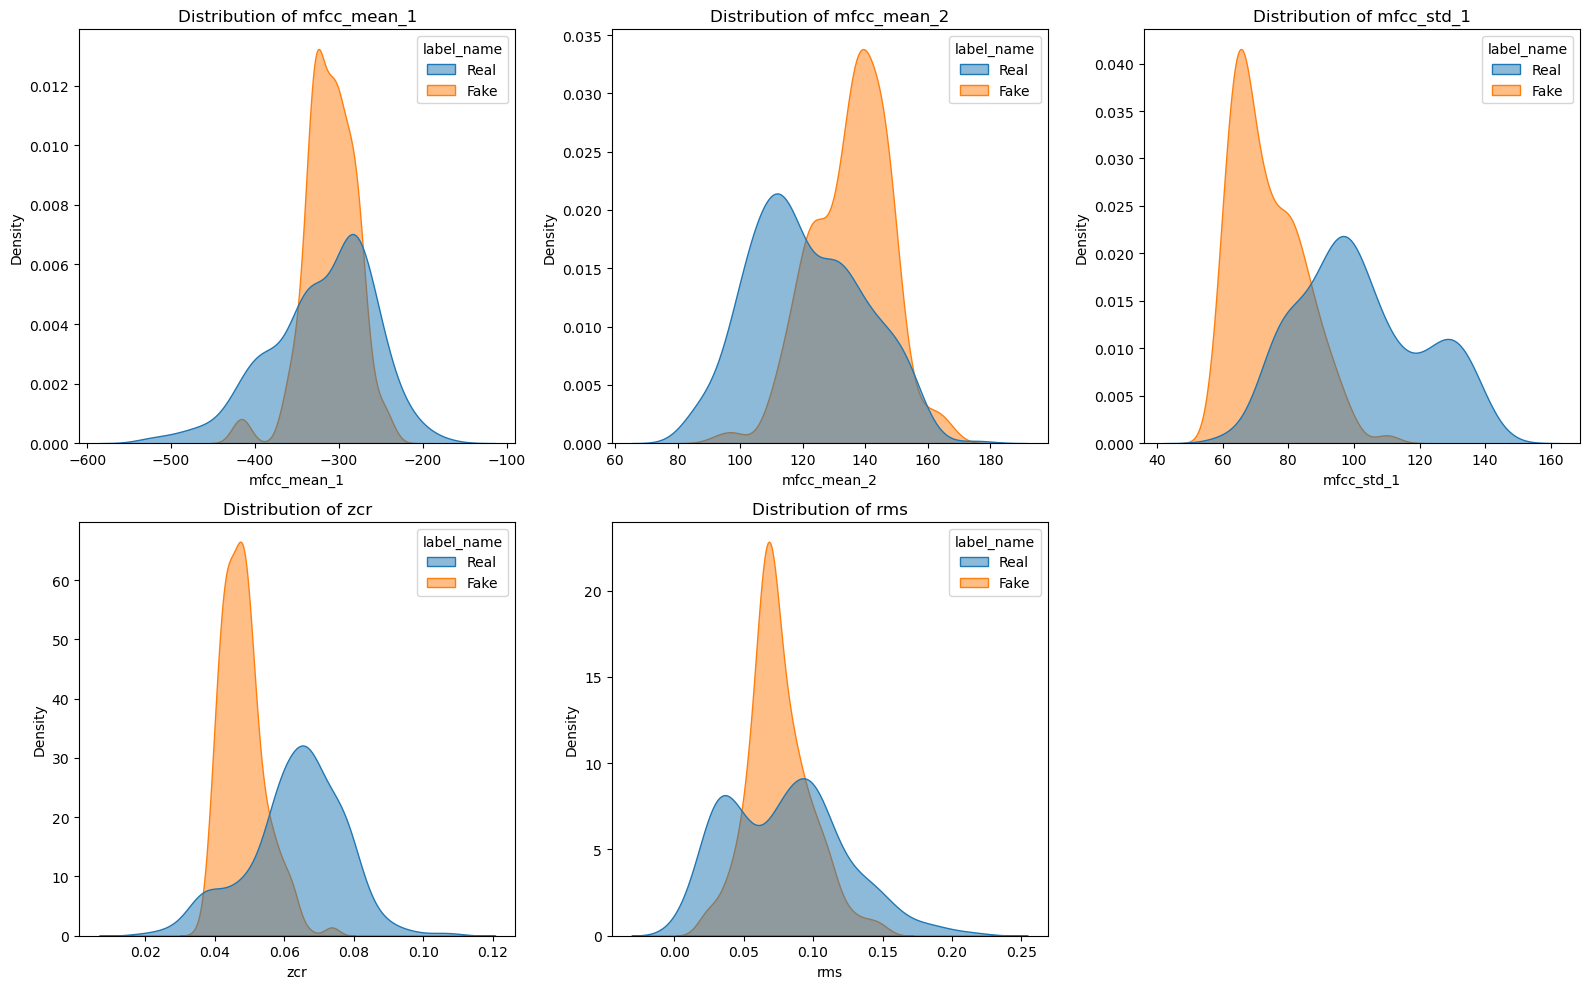

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../Extracted Features/features_combined.csv")  # Replace with actual path

# Add readable label names
df["label_name"] = df["label"].map({1: "Real", 0: "Fake"})

# Select features to visualize
features_to_plot = ["mfcc_mean_1", "mfcc_mean_2", "mfcc_std_1", "zcr", "rms"]

# Plot feature distributions
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=df, x=feature, hue="label_name", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()
